<a href="https://colab.research.google.com/github/nhp-atel/StockMarketPrediction.github.io/blob/main/StockPricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import yfinance as yf

# Set plot styles
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

# Download data for each stock
company_data = {}
for stock in tech_list:
    company_data[stock] = yf.download(stock, start=start, end=end)

# Add company name to each DataFrame
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]
for stock, name in zip(tech_list, company_name):
    company_data[stock]['company_name'] = name

# Concatenate the DataFrames
df = pd.concat(company_data.values(), axis=0)

# Display the last 10 rows of the dataframe
print(df.tail(10))


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-07-31  185.050003  187.940002  184.460007  186.979996  186.979996   
2024-08-01  189.289993  190.600006  181.869995  184.070007  184.070007   
2024-08-02  166.750000  168.770004  160.550003  167.899994  167.899994   
2024-08-05  154.210007  162.960007  151.610001  161.020004  161.020004   
2024-08-06  161.710007  165.080002  158.539993  161.929993  161.929993   
2024-08-07  166.550003  167.580002  161.429993  162.770004  162.770004   
2024-08-08  165.169998  166.690002  162.550003  165.800003  165.800003   
2024-08-09  166.399994  168.550003  165.850006  166.940002  166.940002   
2024-08-12  168.139999  168.550003  166.110001  166.800003  166.800003   
2024-08-13  167.845001  171.033997  167.100006  170.229996  170.229996   

               Volume company_name  
Date                                
2024-07-31   41667300       AMAZON  


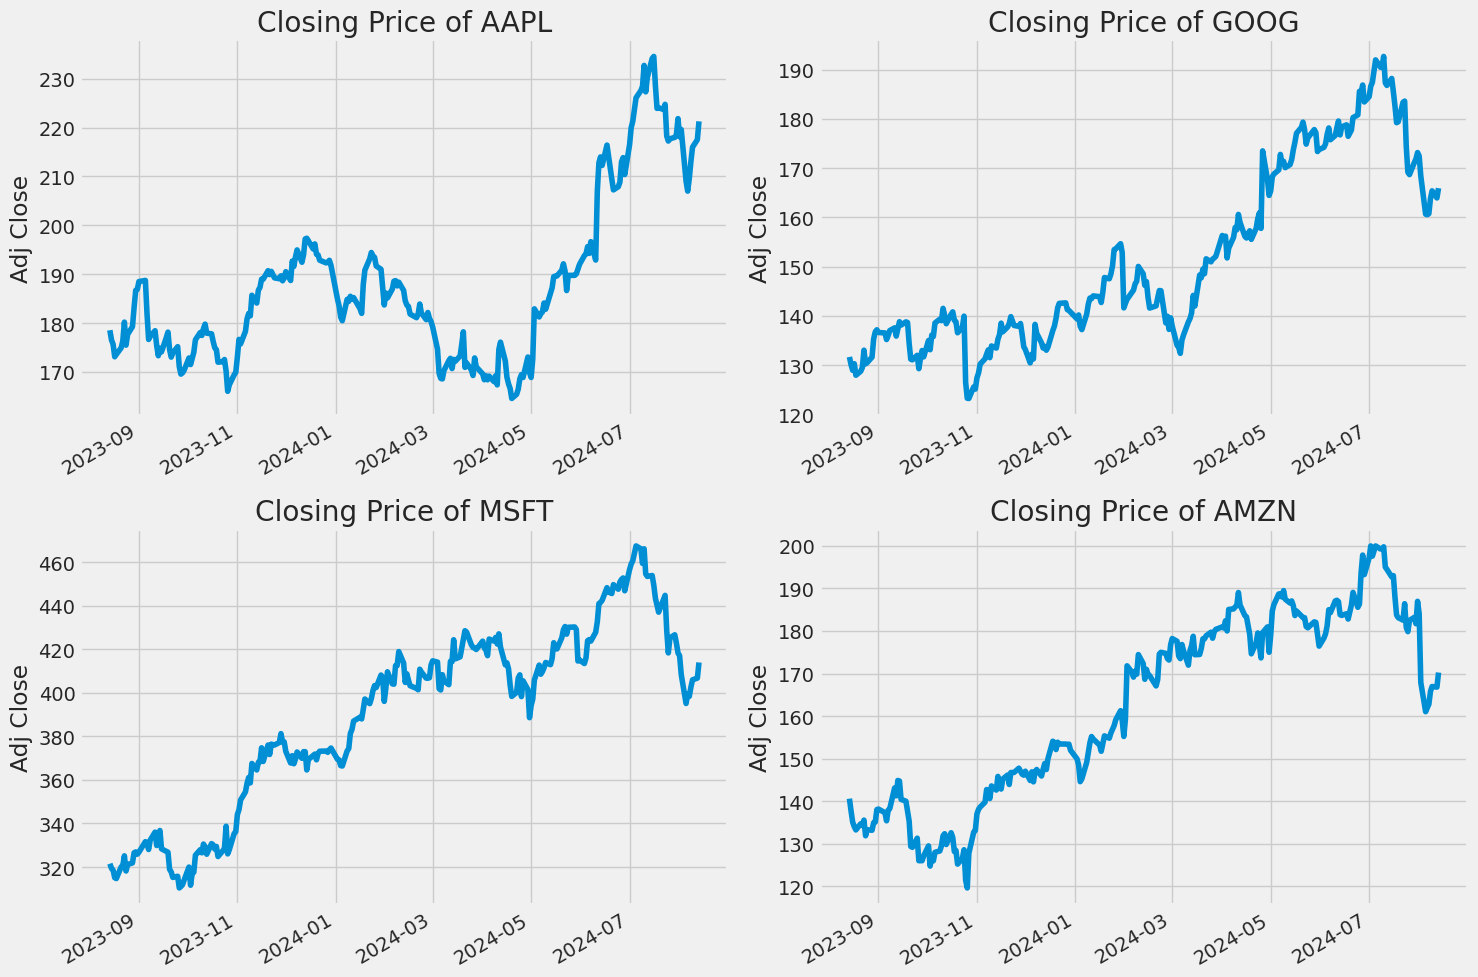

In [ ]:
plt.figure(figsize=(15,10))
plt.subplots_adjust(top=1.25, bottom=1.2)

# Iterate over each company in the tech_list
for i, stock in enumerate(tech_list, 1):
    plt.subplot(2, 2, i)  # 2x2 grid for subplots
    company_data[stock]['Adj Close'].plot()  # Access DataFrame using stock ticker
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {stock}")

plt.tight_layout()
plt.show()  # Ensure the plot is displayed


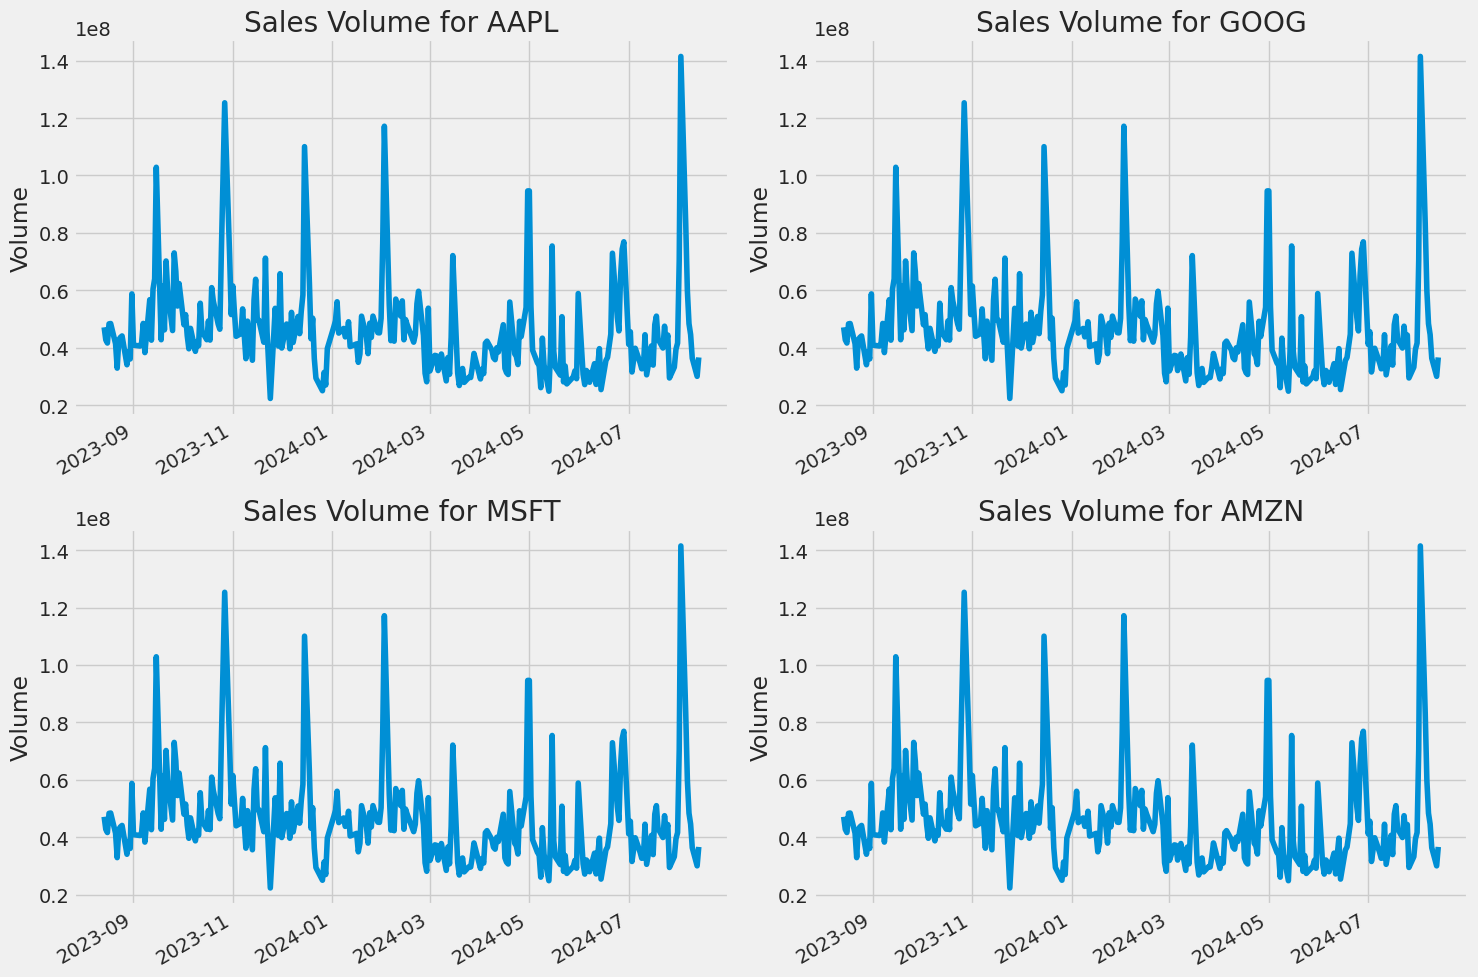

In [ ]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom = 1.2)

for i, company in enumerate(tech_list, 1):
  plt.subplot(2,2,i)
  company_data[stock]['Volume'].plot()
  plt.ylabel('Volume')
  plt.xlabel(None)
  plt.title(f"Sales Volume for {tech_list[i - 1]}")

plt.tight_layout()

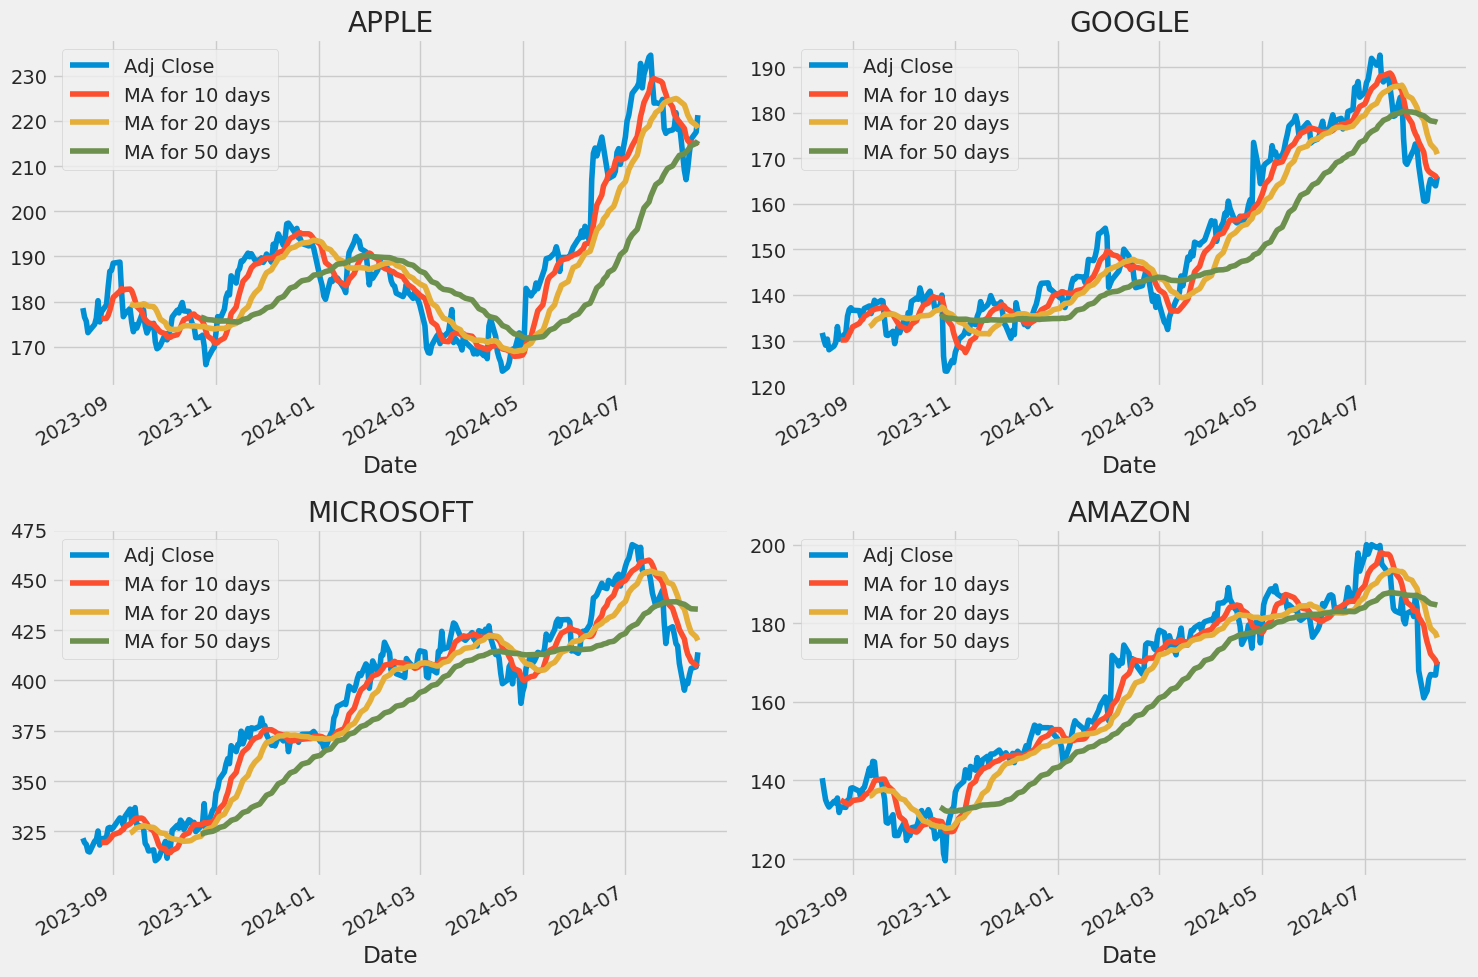

In [ ]:
# Define the moving average days
ma_day = [10, 20, 50]

# Calculate moving averages and add them to each company's DataFrame
for ma in ma_day:
    for stock in tech_list:
        column_name = f"MA for {ma} days"
        company_data[stock][column_name] = company_data[stock]['Adj Close'].rolling(ma).mean()

# Create subplots for each company's stock data
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

# Plot each company's data with moving averages
company_data['AAPL'][['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0, 0])
axes[0, 0].set_title('APPLE')

company_data['GOOG'][['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0, 1])
axes[0, 1].set_title('GOOGLE')

company_data['MSFT'][['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1, 0])
axes[1, 0].set_title('MICROSOFT')

company_data['AMZN'][['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1, 1])
axes[1, 1].set_title('AMAZON')

# Adjust layout
fig.tight_layout()
plt.show()


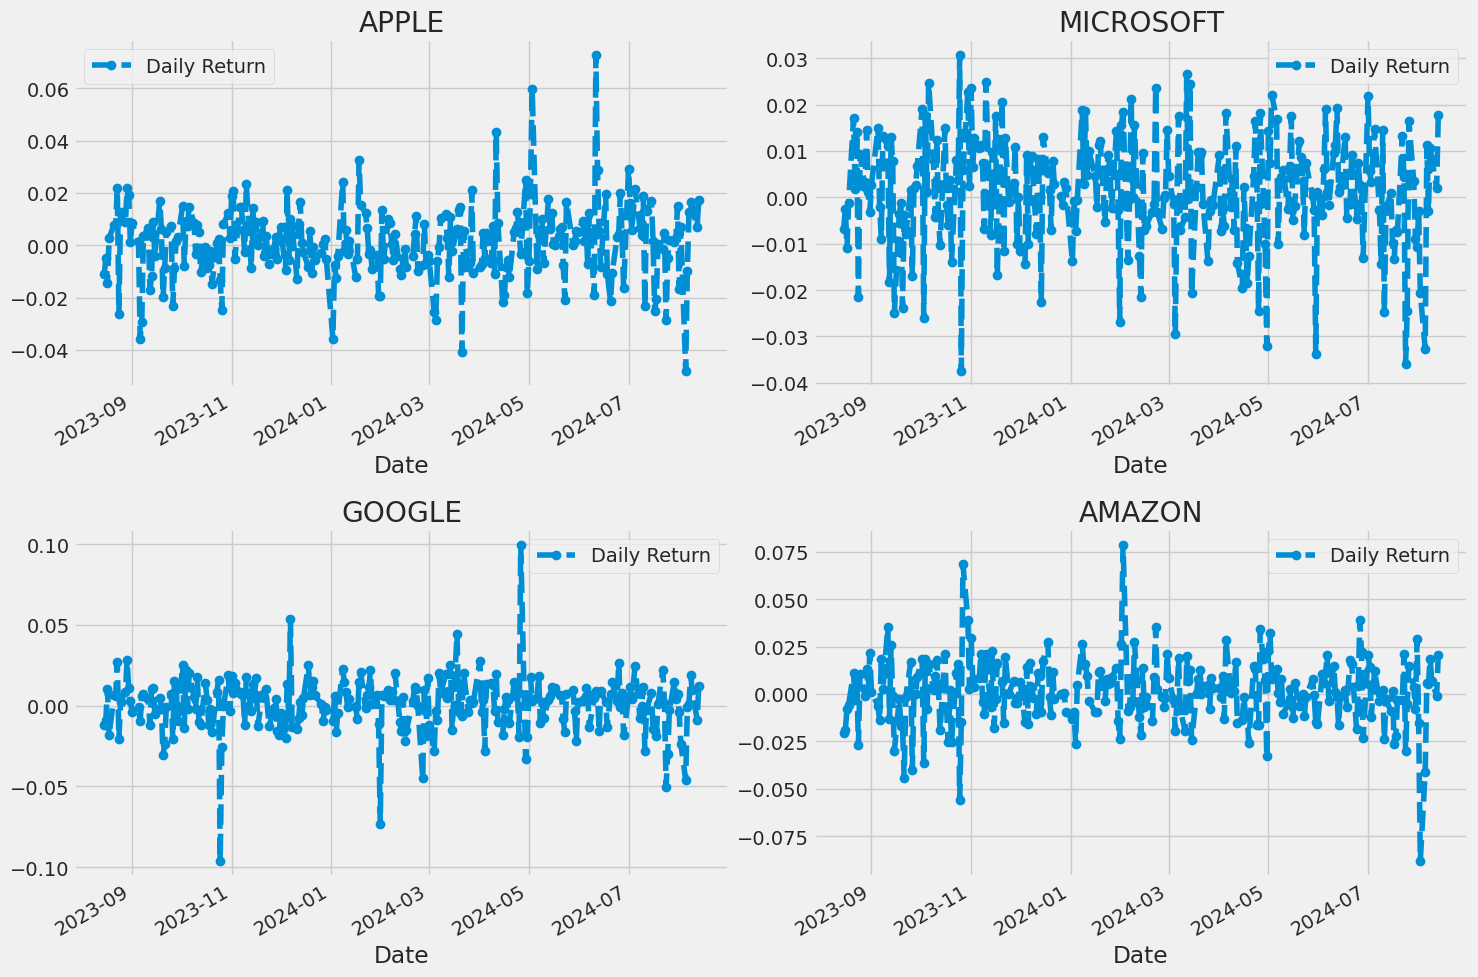

In [ ]:
# Calculate the daily return for each stock
for stock in tech_list:
    company_data[stock]['Daily Return'] = company_data[stock]['Adj Close'].pct_change()

# Create subplots for each company's daily return
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

# Plotting the daily returns with custom styles
company_data['AAPL']['Daily Return'].plot(ax=axes[0, 0], legend=True, linestyle='--', marker='o')
axes[0, 0].set_title('APPLE')

company_data['MSFT']['Daily Return'].plot(ax=axes[0, 1], legend=True, linestyle='--', marker='o')
axes[0, 1].set_title('MICROSOFT')

company_data['GOOG']['Daily Return'].plot(ax=axes[1, 0], legend=True, linestyle='--', marker='o')
axes[1, 0].set_title('GOOGLE')

company_data['AMZN']['Daily Return'].plot(ax=axes[1, 1], legend=True, linestyle='--', marker='o')
axes[1, 1].set_title('AMAZON')

# Adjust layout to prevent overlap
fig.tight_layout()
plt.show()


Stock: AAPL, Type: <class 'pandas.core.frame.DataFrame'>
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-08-14  177.970001  179.690002  177.309998  179.460007  178.546371   
2023-08-15  178.880005  179.479996  177.050003  177.449997  176.546585   
2023-08-16  177.130005  178.539993  176.500000  176.570007  175.671097   
2023-08-17  177.139999  177.509995  173.479996  174.000000  173.114166   
2023-08-18  172.300003  175.100006  171.960007  174.490005  173.601669   

              Volume company_name  MA for 10 days  MA for 20 days  \
Date                                                                
2023-08-14  43675600        APPLE             NaN             NaN   
2023-08-15  43622600        APPLE             NaN             NaN   
2023-08-16  46964900        APPLE             NaN             NaN   
2023-08-17  66062900        APPLE             NaN             NaN   
2023-08-18

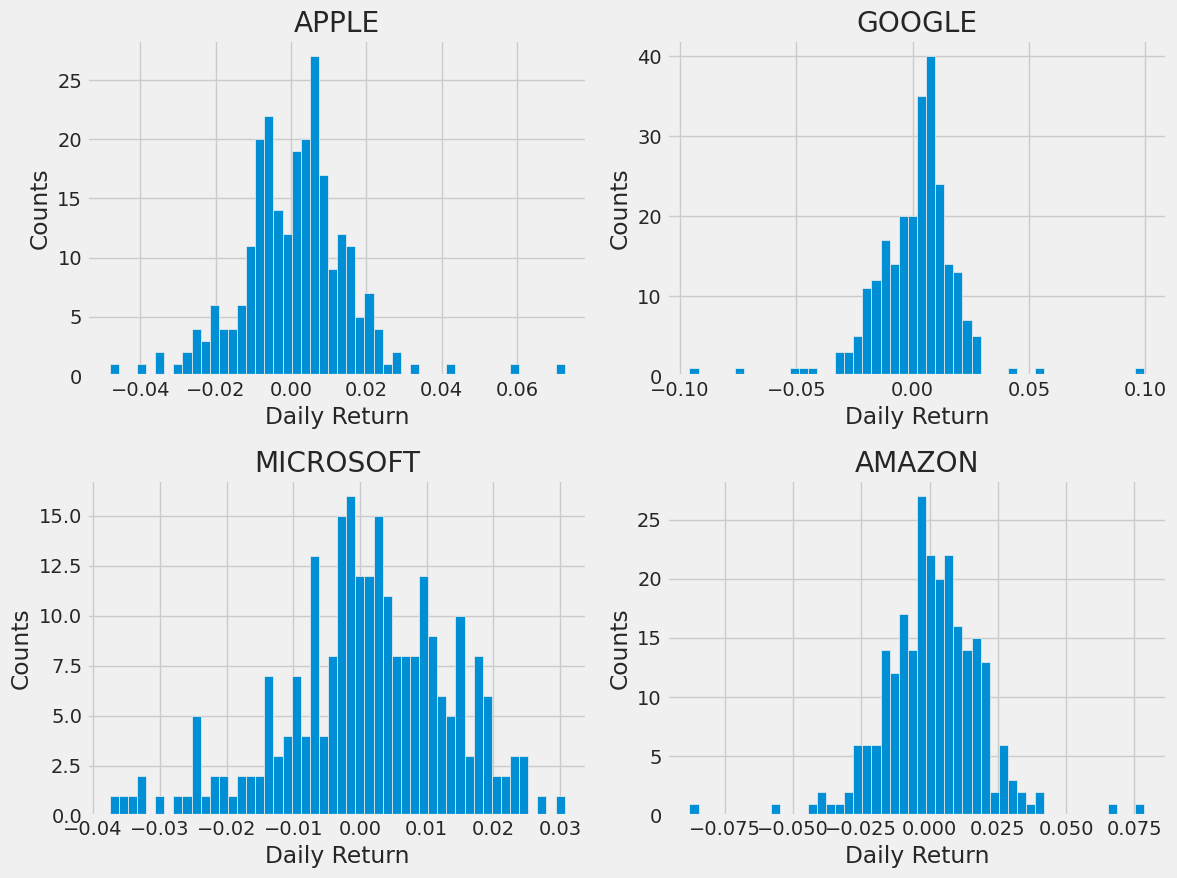

In [ ]:
# Check the type and preview the DataFrame for each stock
for stock in tech_list:
    print(f"Stock: {stock}, Type: {type(company_data[stock])}")
    print(company_data[stock].head())  # Check the first few rows of the DataFrame

# Plotting the Daily Returns
plt.figure(figsize=(12, 9))

for i, stock in enumerate(tech_list, 1):
    plt.subplot(2, 2, i)
    company_data[stock]['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i-1]}')

plt.tight_layout()
plt.show()


In [ ]:
closing_df = pd.DataFrame()


In [ ]:
for stock in tech_list:
    stock_data = yf.download(stock, start=start, end=end)
    closing_df[stock] = stock_data['Adj Close']

# Calculate the daily returns
tech_rets = closing_df.pct_change()

# Display the first few rows of the daily returns
tech_rets.tail()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,AAPL,GOOG,MSFT,AMZN
Date,,,,
2024-08-07,0.012498,0.001308,-0.002953,0.005187
2024-08-08,0.016633,0.019222,0.010692,0.018615
2024-08-09,0.013736,0.009460,0.008269,0.006876
2024-08-12,0.007130,-0.008707,0.001946,-0.000839
2024-08-13,0.017193,0.012077,0.017699,0.020564


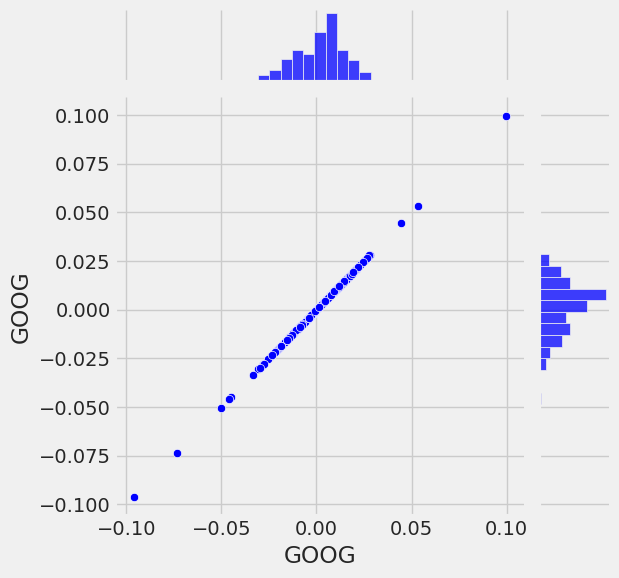

In [ ]:
sns.jointplot(x='GOOG', y ='GOOG', data=tech_rets, kind = 'scatter', color='blue')

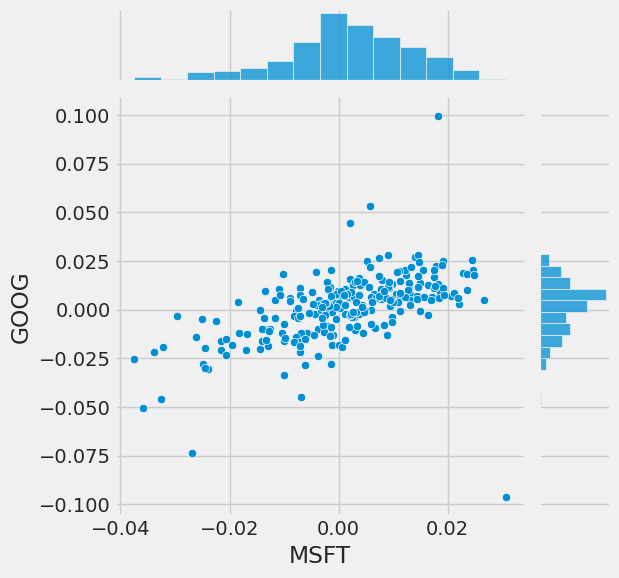

In [ ]:
sns.jointplot(x='MSFT', y = 'GOOG', data=tech_rets, kind='scatter')

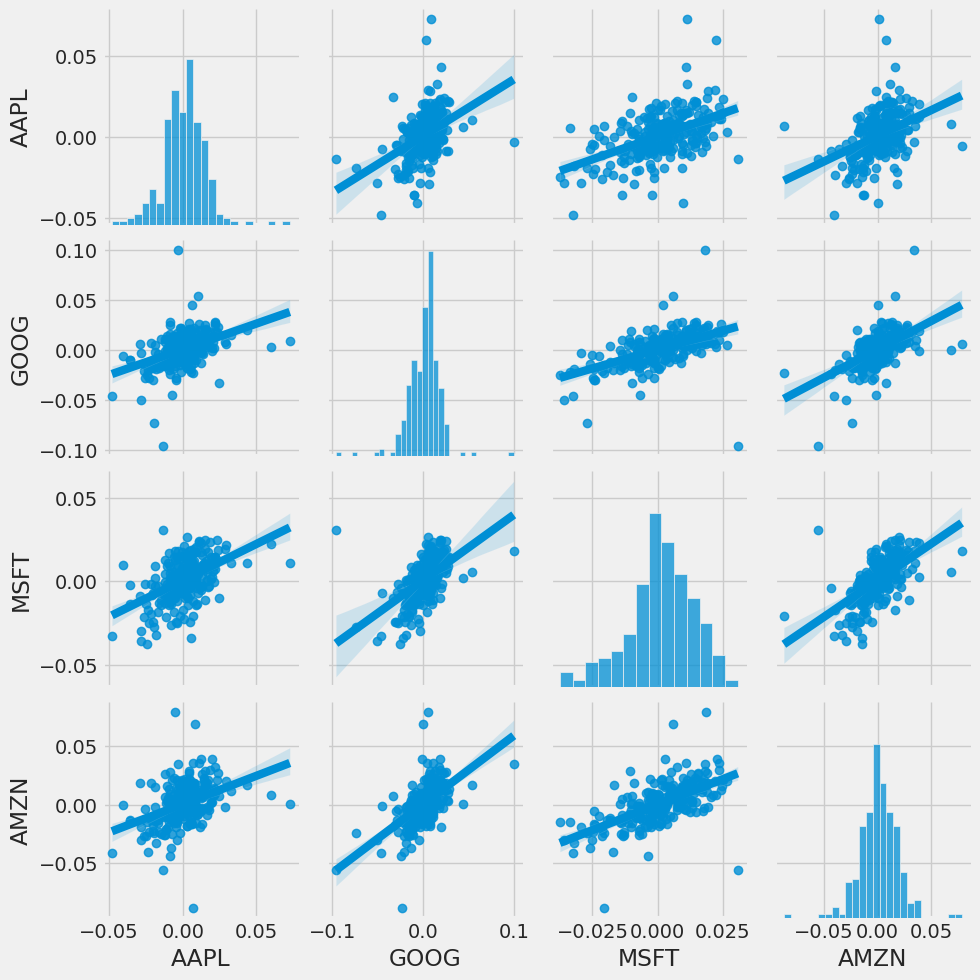

In [ ]:
sns.pairplot(tech_rets, kind = 'reg')

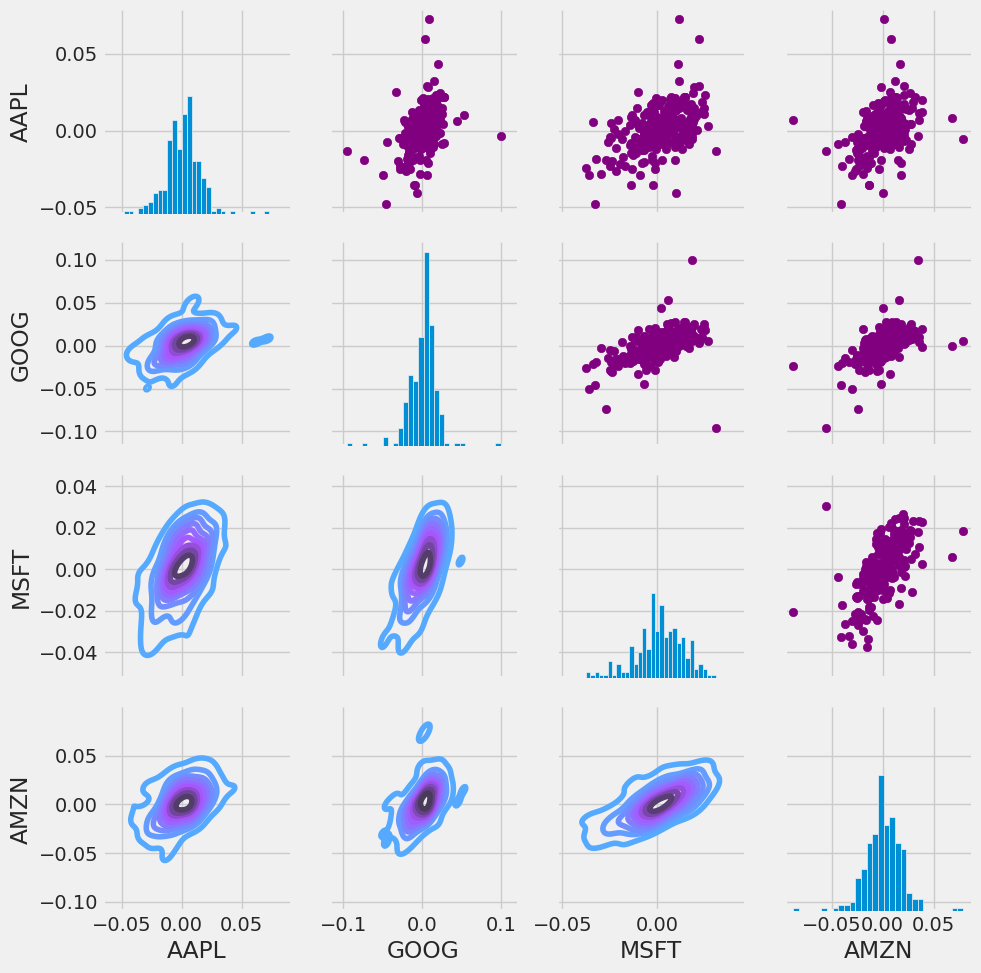

In [ ]:
return_fig = sns.PairGrid(tech_rets.dropna())

return_fig.map_upper(plt.scatter, color='purple')

return_fig.map_lower(sns.kdeplot, cmap='cool_d')

return_fig.map_diag(plt.hist, bins=30)

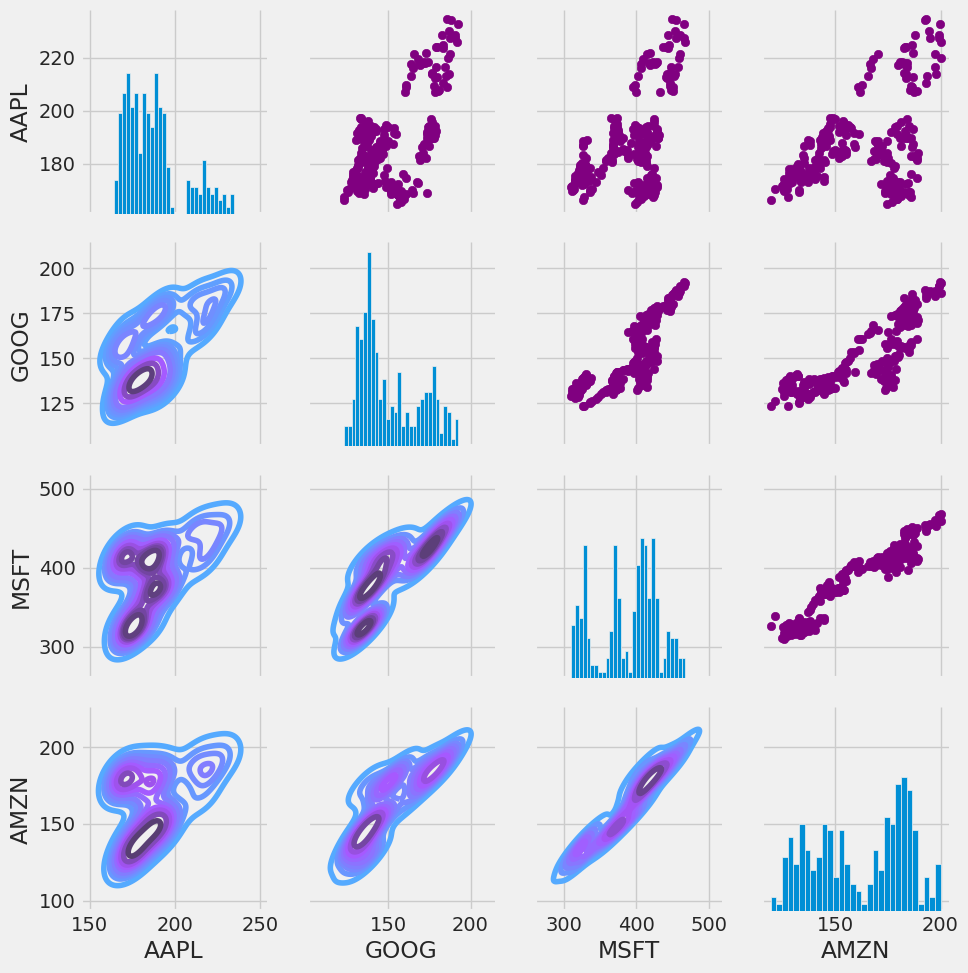

In [ ]:
returns_fig = sns.PairGrid(closing_df)
returns_fig.map_upper(plt.scatter, color = 'purple')

returns_fig.map_lower(sns.kdeplot, cmap='cool_d')

returns_fig.map_diag(plt.hist, bins = 30)

Text(0.5, 1.0, 'Correlation nof stock closing price')

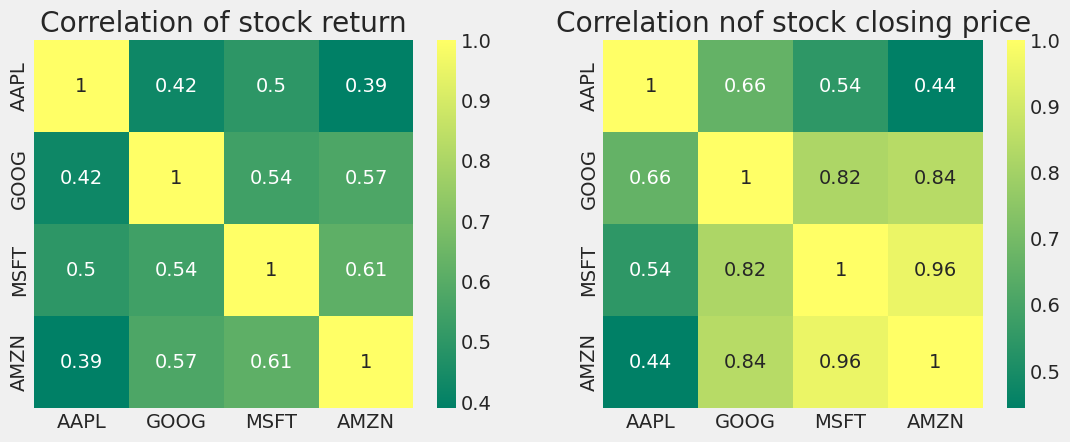

In [ ]:
plt.figure(figsize=(12,10))

plt.subplot(2,2,1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2,2,2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation nof stock closing price')

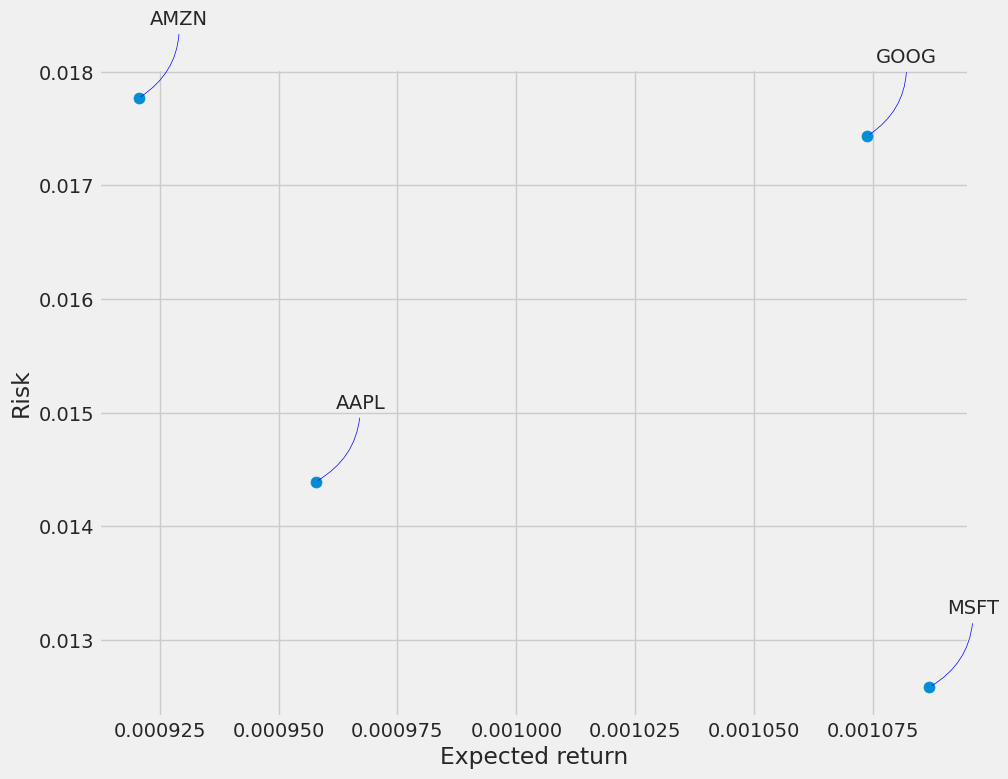

In [ ]:
# Remove any NaN values
rets = tech_rets.dropna()

# Define the size of the scatter plot markers
area = np.pi * 20

# Create the scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

# Annotate each point in the scatter plot
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points',
                 ha='right', va='bottom',
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

plt.show()


In [ ]:
df = yf.download('AAPL', start='2012-01-01', end=datetime.now())

# Show the data
print(df)

[*********************100%%**********************]  1 of 1 completed

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2012-01-03   14.621429   14.732143   14.607143   14.686786   12.402628   
2012-01-04   14.642857   14.810000   14.617143   14.765714   12.469280   
2012-01-05   14.819643   14.948214   14.738214   14.929643   12.607713   
2012-01-06   14.991786   15.098214   14.972143   15.085714   12.739510   
2012-01-09   15.196429   15.276786   15.048214   15.061786   12.719307   
...                ...         ...         ...         ...         ...   
2024-08-07  206.899994  213.639999  206.389999  209.820007  209.577423   
2024-08-08  213.110001  214.199997  208.830002  213.309998  213.063385   
2024-08-09  212.100006  216.779999  211.970001  216.240005  215.990005   
2024-08-12  216.070007  219.509995  215.600006  217.529999  217.529999   
2024-08-13  219.009995  221.889999  219.009995  221.270004  221.270004   

               Volume  
Date         

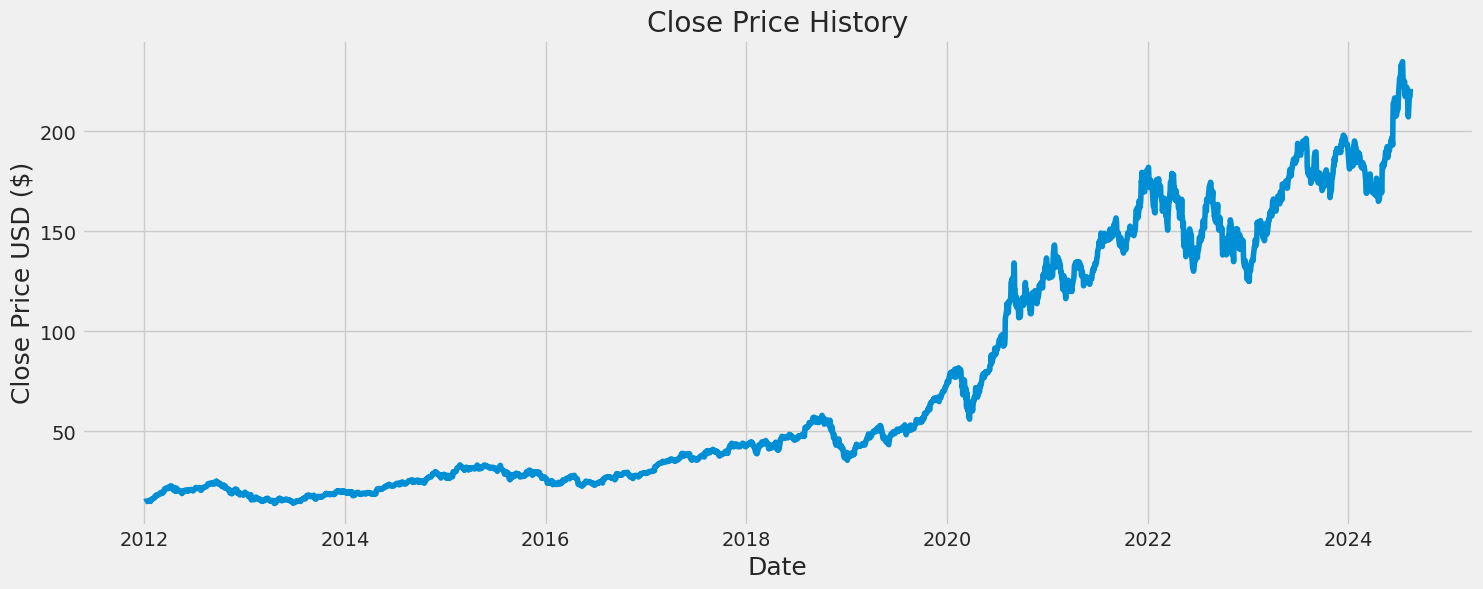

In [ ]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price USD ($)', fontsize = 18)
plt.show()

In [ ]:
data = df.filter(['Close'])

dataset = data.values
training_data_len = int(np.ceil(len(dataset) * .95))

training_data_len

3015

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00334711],
       [0.00370446],
       [0.00444665],
       ...,
       [0.91587906],
       [0.92171951],
       [0.93865238]])

In [ ]:
train_data = scaled_data[0:int(training_data_len), :]

x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i<= 61:
    print(x_train)
    print(y_train)
    print()

x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

[array([0.00334711, 0.00370446, 0.00444665, 0.00515326, 0.00504493,
       0.00528909, 0.00517752, 0.00498995, 0.00473447, 0.00552516,
       0.00623825, 0.00601834, 0.0048137 , 0.00596336, 0.00483149,
       0.00907602, 0.00874778, 0.00917627, 0.01010279, 0.01066387,
       0.01061698, 0.01044397, 0.0111813 , 0.01187498, 0.01266083,
       0.01393014, 0.01659652, 0.01663694, 0.01812132, 0.01923055,
       0.01732415, 0.01805825, 0.0180437 , 0.0201021 , 0.01980942,
       0.0203511 , 0.02132451, 0.0218662 , 0.02342657, 0.02456329,
       0.02489154, 0.02500635, 0.02306276, 0.02259383, 0.02266337,
       0.02449054, 0.02500473, 0.02610912, 0.02871243, 0.03218567,
       0.03153564, 0.03153726, 0.03404841, 0.03483426, 0.03427478,
       0.03376382, 0.03323184, 0.03499918, 0.03621191, 0.03671963])]
[0.03546486572351548]

[array([0.00334711, 0.00370446, 0.00444665, 0.00515326, 0.00504493,
       0.00528909, 0.00517752, 0.00498995, 0.00473447, 0.00552516,
       0.00623825, 0.00601834, 0.00

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer = 'adam', loss = 'mean_absolute_error')

model.fit(x_train, y_train,  batch_size = 1, epochs = 1)

2955/2955 ━━━━━━━━━━━━━━━━━━━━ 283s 94ms/step - loss: 0.0276


In [ ]:
test_data = scaled_data[training_data_len - 60: , :]

x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
rmse = np.sqrt(np.mean(((predictions - y_test)**2)))
rmse

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 117ms/step


5.180894133662835

<ipython-input-35-763d38d978f3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


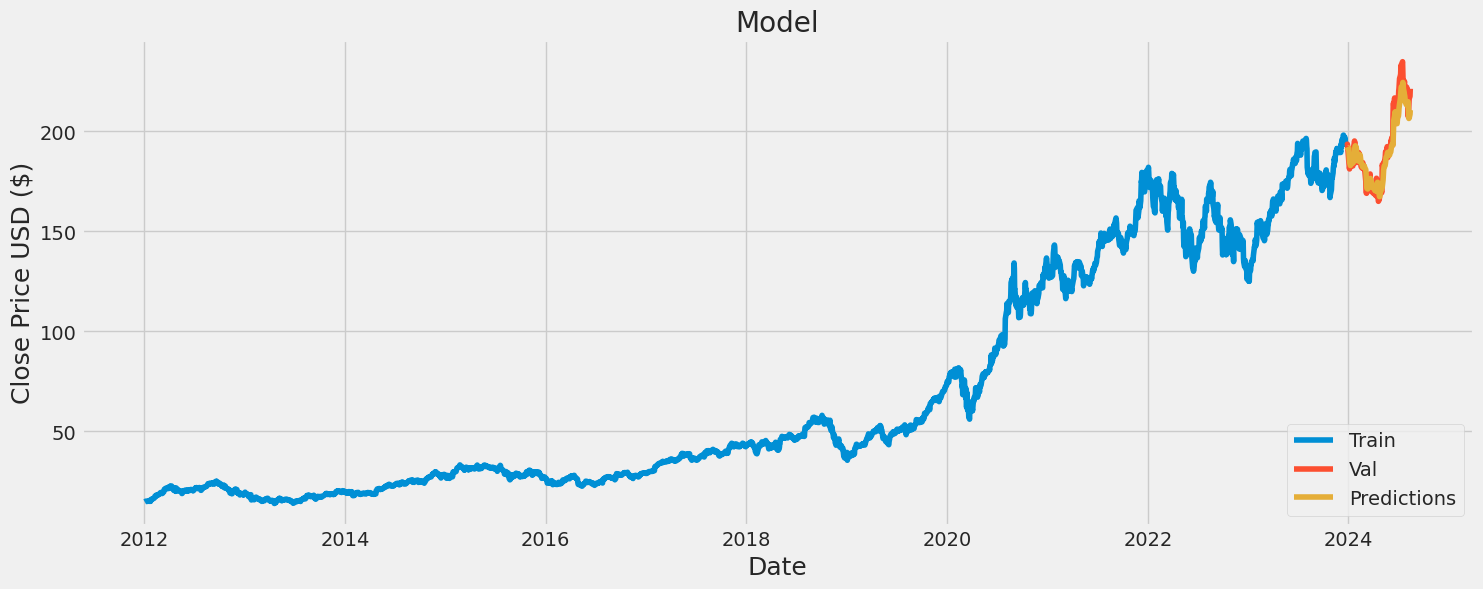

In [ ]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price USD ($)', fontsize = 18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc = 'lower right')
plt.show()

In [ ]:
valid

,Close,Predictions
Date,,
2023-12-27,193.149994,192.065948
2023-12-28,193.580002,191.734131
2023-12-29,192.529999,191.753540
2024-01-02,185.639999,191.621140
2024-01-03,184.250000,189.597305
...,...,...
2024-08-07,209.820007,208.375381
2024-08-08,213.309998,206.419632
2024-08-09,216.240005,206.642578
